The purpose of this file is to calculate RSCU values for codons in a given sequence, optionally using a sliding window approach and considering cleavage sites. It includes functionality to visualize the RSCU values and filter them based on variance thresholds.

In [1]:
import sys
import os

# Add the directory containing your modules to Python path
sys.path.append('/Users/ellateasell/Research/CodonUsageBias/code')

from Bio import SeqIO
from lib.calculations import run_rscu_analysis, rscu_to_string
from rscu import PROJ_DIR 
import pandas as pd
import numpy as np
from lib.aminoacids import AA_TO_CODONS_MULTI_CODON_FAMILIES, SLOW, FAST

In [75]:
############ Variables ###########

# Note that the distance variable (d_aa) can be set for each sequence individually when external data is available
# Here we set a default value for all sequences
# The cell below builds an array from this default value, but this can be replaced with an array built from external data

w_aa = 21  # window size in amino acids
d_aa = 40  # distance from cleavage site in amino acids
UseCs = True # when true, we measure the window as the distance from the cleavage site, otherwise from start codon
UseSpAsWindow = False # when true, the window we extract is only the SP region, not a fixed window size

In [76]:
######### Using windows and complements ############

# adjust for nucleotides
w_n = int(w_aa*3) # window size in nucleotides
d_n = int(d_aa*3) # distance from cleavage site in nucleotides

# load SP ORFS (genomic)
all_fasta_path = '../data/dna_filtered.fasta'
records = list(SeqIO.parse(all_fasta_path, 'fasta'))

# load SP data
tsv_path = '../data/sp_regions_filtered.tsv'
df = pd.read_table(tsv_path, index_col='sys_name')

# build numpy array of cleavage site values corresponding to the ordering of records
arr_cs_aa = np.zeros(len(records))
for i, record in enumerate(records):
    row = df.loc[record.id]
    arr_cs_aa[i] = row['cs'] if UseCs else 0
arr_cs_n = arr_cs_aa * 3

# build numpy array of npet values, can be loaded with external data when available
arr_npet_n = np.full(len(records), d_n, dtype=int) # set using distance variable above for now

max_len = max(len(record.seq) for record in records)
min_len = min(len(record.seq) for record in records)
print(f"Min length of records: {min_len}")
print(f"Max length of records: {max_len}")

max_cs = df['cs'].max()
min_cs = df['cs'].min()
print(f"Max cleavage site: {max_cs}")
print(f"Min cleavage site: {min_cs}")

window_rscu, full_rscu = run_rscu_analysis(records, arr_cs_n, arr_npet_n, w_n, UseCs, UseSpAsWindow)

print("RSCU values for window:")
print(rscu_to_string(window_rscu))
print("RSCU values for complement ORF:")
print(rscu_to_string(full_rscu))
    

Min length of records: 240
Max length of records: 5409
Max cleavage site: 38.0
Min cleavage site: 16.0
RSCU values for window:
GCT: 1.86
GCC: 1.07
GCA: 0.78
GCG: 0.28
CGT: 1.16
CGC: 0.45
CGA: 0.30
CGG: 0.15
AGA: 2.97
AGG: 0.96
AAT: 1.04
AAC: 0.96
GAT: 1.27
GAC: 0.73
TGT: 1.31
TGC: 0.69
CAA: 1.33
CAG: 0.67
GAA: 1.40
GAG: 0.60
GGT: 2.18
GGC: 0.86
GGA: 0.60
GGG: 0.36
CAT: 1.39
CAC: 0.61
ATT: 1.39
ATC: 0.87
ATA: 0.74
TTA: 1.46
TTG: 2.04
CTT: 0.84
CTC: 0.41
CTA: 0.62
CTG: 0.62
AAA: 1.10
AAG: 0.90
TTT: 0.99
TTC: 1.01
CCT: 1.39
CCC: 0.53
CCA: 1.50
CCG: 0.57
TCT: 1.68
TCC: 0.93
TCA: 1.22
TCG: 0.51
AGT: 0.97
AGC: 0.69
ACT: 1.64
ACC: 1.21
ACA: 0.80
ACG: 0.36
TAT: 0.90
TAC: 1.10
GTT: 1.65
GTC: 0.88
GTA: 0.77
GTG: 0.69
RSCU values for complement ORF:
GCT: 1.65
GCC: 0.98
GCA: 1.00
GCG: 0.36
CGT: 0.92
CGC: 0.36
CGA: 0.37
CGG: 0.27
AGA: 2.91
AGG: 1.17
AAT: 1.07
AAC: 0.93
GAT: 1.24
GAC: 0.76
TGT: 1.34
TGC: 0.66
CAA: 1.41
CAG: 0.59
GAA: 1.41
GAG: 0.59
GGT: 1.96
GGC: 0.78
GGA: 0.83
GGG: 0.43
CAT: 1.22
C

In [ ]:
########### For loading Jan 2024 data instead #####################

# # adjust for nucleotides
# w_n = int(w_aa*3) # window size in nucleotides
# d_n = int(d_aa*3) # distance from cleavage site in nucleotides

# # load SP ORFS (genomic)
# all_fasta_path = '../data/new_dna_filtered.fasta'
# records = list(SeqIO.parse(all_fasta_path, 'fasta'))

# # load hydrophobic region data
# tsv_path = '../data/srp_dep_minimal.csv'
# df = pd.read_csv(tsv_path, index_col='gene')

# # build numpy array of hydrophobic region start values corresponding to the ordering of records
# arr_cs_aa = np.zeros(len(records))
# for i, record in enumerate(records):
#     row = df.loc[record.id]
#     arr_cs_aa[i] = row['hydrophobic_start'] if UseCs else 0
# arr_cs_n = arr_cs_aa * 3

# # build numpy array of npet values, can be loaded with external data when available
# arr_npet_n = np.full(len(records), d_n, dtype=int) # set using distance variable above for now

# max_len = max(len(record.seq) for record in records)
# min_len = min(len(record.seq) for record in records)
# print(f"Min length of records: {min_len}")
# print(f"Max length of records: {max_len}")

# max_cs = df['hydrophobic_start'].max()
# min_cs = df['hydrophobic_start'].min()
# print(f"Max hydrophobic_start: {max_cs}")
# print(f"Min hydrophobic_start: {min_cs}")

# window_rscu, full_rscu = run_rscu_analysis(records, arr_cs_n, arr_npet_n, w_n, UseCs, UseSpAsWindow)

# print("RSCU values for window:")
# print(rscu_to_string(window_rscu))
# print("RSCU values for complement ORF:")
# print(rscu_to_string(full_rscu))

Min length of records: 102
Max length of records: 8877
Max hydrophobic_start: 60.0
Min hydrophobic_start: 2.0
Sequence YBL040C length is not a multiple of three.
Invalid extraction for record YBL040C. Skipping.
Sequence YBR058C-A too short for window choice.
Invalid extraction for record YBR058C-A. Skipping.
Sequence YBR196C-A too short for window choice.
Invalid extraction for record YBR196C-A. Skipping.
Sequence YBR255C-A length is not a multiple of three.
Invalid extraction for record YBR255C-A. Skipping.
Sequence YCL005W-A length is not a multiple of three.
Invalid extraction for record YCL005W-A. Skipping.
Sequence YCL002C length is not a multiple of three.
Invalid extraction for record YCL002C. Skipping.
Sequence YCR024C-B too short for window choice.
Invalid extraction for record YCR024C-B. Skipping.
Sequence YCR024C-A too short for window choice.
Invalid extraction for record YCR024C-A. Skipping.
Sequence YDL232W too short for window choice.
Invalid extraction for record YDL232

In [78]:
########### Save RSCU values #########

from lib.data_access_helpers import save_rscu

save_rscu("../data/rscu/SP_genes.tsv", window_rscu, full_rscu)

In [79]:
# RSCU values to numpy arrays

rscu_w = np.array(list(window_rscu.values()))
rscu_b = np.array(list(full_rscu.values()))

codons = list(window_rscu.keys())

diffs = rscu_w - rscu_b
avg_diffs = np.mean(diffs)

ratios = rscu_w / rscu_b
avg_ratios = np.mean(ratios)

print("Sanity check...")
print(f"    Average difference: {avg_diffs:.3f}")
print(f"    Average ratio: {avg_ratios:.3f}")

print("Differences between window and complement ORF RSCU values (window - background):")
for codon, diff in zip(codons, diffs): 
    print(f"{codon}: {diff:.3f}")

Sanity check...
    Average difference: 0.000
    Average ratio: 0.997
Differences between window and complement ORF RSCU values (window - background):
GCT: 0.209
GCC: 0.090
GCA: -0.221
GCG: -0.079
CGT: 0.244
CGC: 0.098
CGA: -0.070
CGG: -0.118
AGA: 0.063
AGG: -0.217
AAT: -0.031
AAC: 0.031
GAT: 0.025
GAC: -0.025
TGT: -0.033
TGC: 0.033
CAA: -0.079
CAG: 0.079
GAA: -0.002
GAG: 0.002
GGT: 0.222
GGC: 0.086
GGA: -0.231
GGG: -0.076
CAT: 0.167
CAC: -0.167
ATT: -0.024
ATC: 0.004
ATA: 0.020
TTA: -0.079
TTG: 0.254
CTT: 0.073
CTC: 0.032
CTA: -0.270
CTG: -0.010
AAA: -0.038
AAG: 0.038
TTT: -0.118
TTC: 0.118
CCT: 0.261
CCC: -0.075
CCA: -0.398
CCG: 0.212
TCT: -0.100
TCC: -0.150
TCA: 0.012
TCG: 0.029
AGT: 0.102
AGC: 0.106
ACT: 0.159
ACC: 0.185
ACA: -0.264
ACG: -0.080
TAT: -0.129
TAC: 0.129
GTT: 0.121
GTC: -0.138
GTA: 0.011
GTG: 0.005


In [80]:
############# Analyze by codon family #############

VARIANCE_THRESHOLD = 0.02

aa_codon_dict = {
    aa: {codon: 0 for codon in codons_lst}
    for aa, codons_lst in AA_TO_CODONS_MULTI_CODON_FAMILIES.items()
}

for i in range(len(codons)):
    codon = codons[i]
    diff = diffs[i]
    for aa, codons_lst in AA_TO_CODONS_MULTI_CODON_FAMILIES.items():
        if codon in codons_lst:
            aa_codon_dict[aa][codon] = diff
     
variances = {aa: np.var(list(codon_family.values())) for aa, codon_family in aa_codon_dict.items()}
print("Variance of differences by amino acid:")
for aa, var in variances.items():
    print(f"{aa}: {var:.3f}")
                
print("Differences by amino acid:")
for aa, codon_family in aa_codon_dict.items():
    print(f"{aa}:")
    for codon, diff in codon_family.items():
        print(f"  {codon}: {diff:.3f}")
    var = np.var(list(codon_family.values()))
    print(f"  Sum: {sum(codon_family.values()):.3f}")
    print(f"  Variance: {var:.3f}")
    
    
##### filter codon list for the scatterplot by family variance threshold
varied_aa = [aa for aa, var in variances.items() if var >= VARIANCE_THRESHOLD]
print(f"Amino acids with variance >= {VARIANCE_THRESHOLD}: {varied_aa}")

filtered_w = []
filtered_b = []
filtered_codons = []
for aa in varied_aa:
    for codon, diff in aa_codon_dict[aa].items():
        i = codons.index(codon)
        filtered_w.append(rscu_w[i])
        filtered_b.append(rscu_b[i])
        filtered_codons.append(codon)
        
filtered_b = np.array(filtered_b)
filtered_w = np.array(filtered_w)



Variance of differences by amino acid:
A: 0.027
R: 0.023
N: 0.001
D: 0.001
C: 0.001
Q: 0.006
E: 0.000
G: 0.029
H: 0.028
I: 0.000
L: 0.025
K: 0.001
F: 0.014
P: 0.069
S: 0.009
T: 0.034
Y: 0.017
V: 0.008
Differences by amino acid:
A:
  GCT: 0.209
  GCC: 0.090
  GCA: -0.221
  GCG: -0.079
  Sum: 0.000
  Variance: 0.027
R:
  CGT: 0.244
  CGC: 0.098
  CGA: -0.070
  CGG: -0.118
  AGA: 0.063
  AGG: -0.217
  Sum: 0.000
  Variance: 0.023
N:
  AAT: -0.031
  AAC: 0.031
  Sum: 0.000
  Variance: 0.001
D:
  GAT: 0.025
  GAC: -0.025
  Sum: 0.000
  Variance: 0.001
C:
  TGT: -0.033
  TGC: 0.033
  Sum: 0.000
  Variance: 0.001
Q:
  CAA: -0.079
  CAG: 0.079
  Sum: 0.000
  Variance: 0.006
E:
  GAA: -0.002
  GAG: 0.002
  Sum: 0.000
  Variance: 0.000
G:
  GGT: 0.222
  GGC: 0.086
  GGA: -0.231
  GGG: -0.076
  Sum: 0.000
  Variance: 0.029
H:
  CAT: 0.167
  CAC: -0.167
  Sum: 0.000
  Variance: 0.028
I:
  ATT: -0.024
  ATC: 0.004
  ATA: 0.020
  Sum: 0.000
  Variance: 0.000
L:
  TTA: -0.079
  TTG: 0.254
  CTT: 0.07

In [81]:

colours = ['k'] * len(codons)

for codon in SLOW:
    index = codons.index(codon)
    colours[index] = 'r' # slow codon
    
for codon in FAST:
    index = codons.index(codon)
    colours[index] = 'b'  # fast codon
    


filtered_colours = ['k'] * len(filtered_codons)

for codon in SLOW:
    if codon not in filtered_codons:
        continue
    index = filtered_codons.index(codon)
    filtered_colours[index] = 'r' # slow codon
    
for codon in FAST:
    if codon not in filtered_codons:
        continue
    index = filtered_codons.index(codon)
    filtered_colours[index] = 'b'  # fast codon

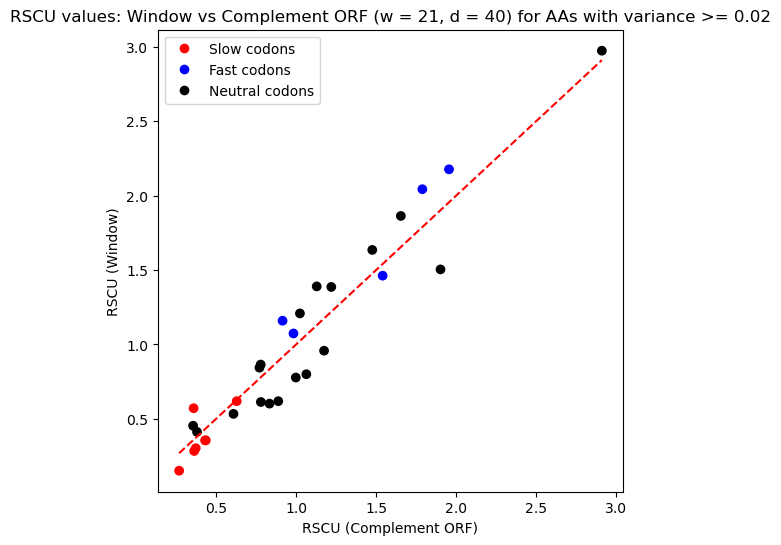

In [82]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D


plt.figure(figsize=(6, 6))
plt.scatter(filtered_b, filtered_w, c = filtered_colours)
plt.xlabel('RSCU (Complement ORF)')
plt.ylabel('RSCU (Window)')
if UseSpAsWindow is False:
    plt.title(f'RSCU values: Window vs Complement ORF (w = {w_aa}, d = {d_aa}) for AAs with variance >= {VARIANCE_THRESHOLD}')
else:   
    plt.title(f'RSCU values: SP vs Complement ORF for AAs with variance >= {VARIANCE_THRESHOLD}')
plt.plot([min(rscu_b), max(rscu_b)], [min(rscu_b), max(rscu_b)], 'r--')

legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=8, label='Slow codons'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=8, label='Fast codons'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='black', markersize=8, label='Neutral codons')]

plt.legend(handles=legend_elements, loc='upper left')
plt.show()

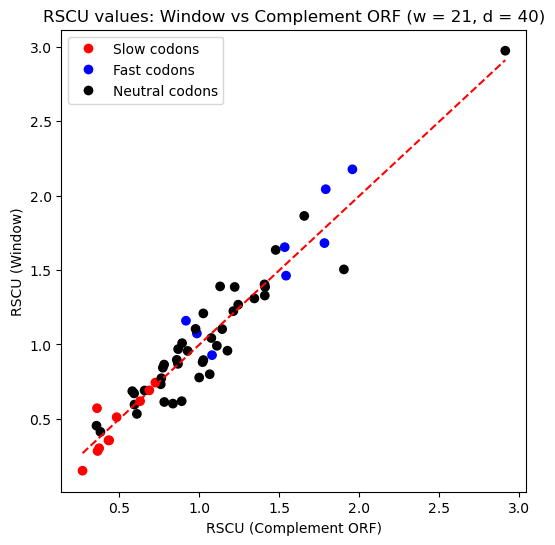

In [83]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D


plt.figure(figsize=(6, 6))
plt.scatter(rscu_b, rscu_w, c = colours)
plt.xlabel('RSCU (Complement ORF)')
plt.ylabel('RSCU (Window)')
if UseSpAsWindow is False:
    plt.title(f'RSCU values: Window vs Complement ORF (w = {w_aa}, d = {d_aa})')
else:   
    plt.title(f'RSCU values: SP vs Complement ORF')
plt.plot([min(rscu_b), max(rscu_b)], [min(rscu_b), max(rscu_b)], 'r--')
# Create custom legend elements
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=8, label='Slow codons'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=8, label='Fast codons'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='black', markersize=8, label='Neutral codons')]

plt.legend(handles=legend_elements, loc='upper left')
plt.show()